In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [3]:
df.dropna(inplace=True)

In [4]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
df.index.freq = 'MS'

In [7]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [8]:
span = 12
alpha = 2 / (span + 1)

In [9]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [10]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [11]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

/home/drslax/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [12]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [13]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

<AxesSubplot:xlabel='Month'>

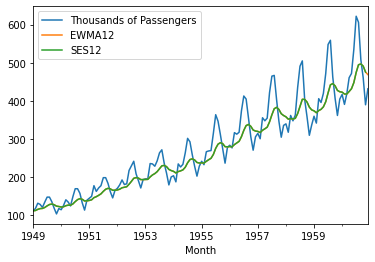

In [14]:
df.plot()

In [15]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

/home/drslax/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [18]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

In [19]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,113.474828,114.978251
1949-02-01,118,112.923077,112.923077,119.464366,121.191659
1949-03-01,132,115.857988,115.857988,133.477561,135.802180
1949-04-01,129,117.879836,117.879836,130.543312,132.657709
1949-05-01,121,118.359861,118.359861,122.528126,124.213566


<AxesSubplot:xlabel='Month'>

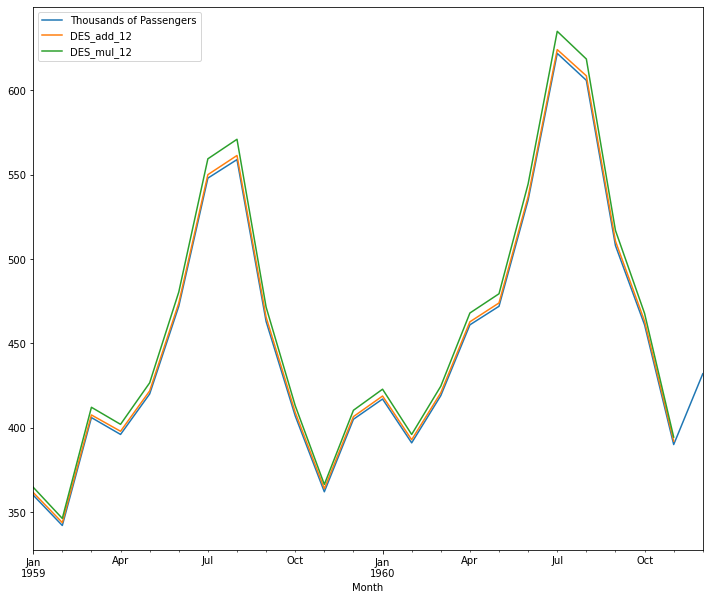

In [20]:
df[['Thousands of Passengers', 'DES_add_12', 'DES_mul_12']].iloc[-24:].plot(figsize=(12,10))

In [21]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

/home/drslax/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/drslax/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [22]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12,TES_mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,113.474828,114.978251,111.597879
1949-02-01,118,112.923077,112.923077,119.464366,121.191659,118.844235
1949-03-01,132,115.857988,115.857988,133.477561,135.802180,133.334951
1949-04-01,129,117.879836,117.879836,130.543312,132.657709,127.901291
1949-05-01,121,118.359861,118.359861,122.528126,124.213566,120.978657


<AxesSubplot:xlabel='Month'>

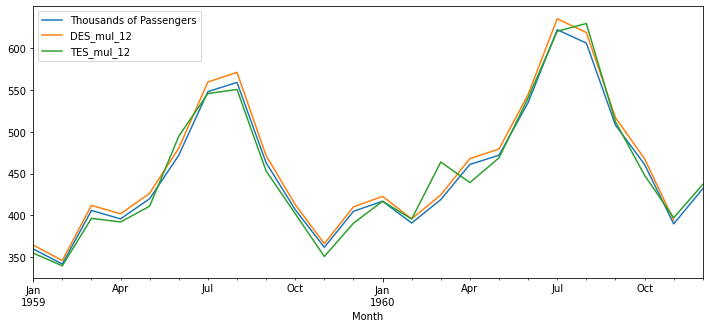

In [23]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[-24:].plot(figsize=(12,5))